<a href="https://colab.research.google.com/github/Apolinar97/CS497_tweet_sentiment_analysis/blob/master/final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#provide acess to drive.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
#locate csv file and download/load it.
downloaded = drive.CreateFile({'id':'166vhh0NJH_DyhTMYTnt-aQKkN7RyO9F2'})
downloaded.GetContentFile('Tweets.csv') 

In [0]:
try:
  %tensorflow_version 2.x
except:
  pass

import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [75]:
#clean data
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')

from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords


df = pd.read_csv('Tweets.csv')
col_to_drop = ['tweet_id','airline_sentiment_confidence',
              'negativereason', 'negativereason_confidence', 'airline',
              'airline_sentiment_gold', 'name', 'negativereason_gold',
              'retweet_count','tweet_coord', 'tweet_created',
              'tweet_location', 'user_timezone']
df.drop(col_to_drop,axis=1, inplace=True)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [0]:
def norm_tweet(tweet):
  tweet = tweet.lower()
  tweet = re.sub('(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)', ' ', tweet)
  tweet = re.sub('[^a-z]+', ' ', tweet)
  return tweet

def tokenize_tweet(tweet):
  tweet_tk = TweetTokenizer()
  return(tweet_tk.tokenize(tweet))


def remove_stopwords(tweet_tokens):
  stop_words = stopwords.words('english')
  return([word for word in tweet_tokens if word not in stop_words])

def remove_stopwords_for_analysis(tweet):
  stop_words = stopwords.words('english')
  white_list = ['no', 'not']
  words_tweet = tweet.split()
  clean_tweet = [word for word in words_tweet if(word not in stop_words or word in white_list)]
  return ' '.join(clean_tweet)

In [0]:
#clean df for basic EDA
df['text'] = df['text'].map(norm_tweet)
df['text'] = df['text'].map(tokenize_tweet)
df['text'] = df['text'].map(remove_stopwords)

In [78]:
#Conduct EDA
df.groupby(['airline_sentiment']).count()

,text
airline_sentiment,
negative,9178
neutral,3099
positive,2363


<function matplotlib.pyplot.show>

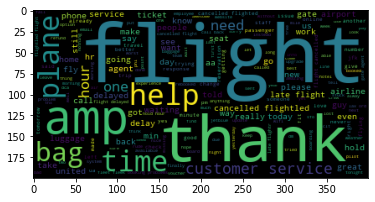

In [79]:
from wordcloud import WordCloud
wordcloud = WordCloud()
wordcloud.generate(' '.join((np.concatenate(df.text.values))))
plt.imshow(wordcloud)
plt.show

In [92]:
ana_df = pd.read_csv('Tweets.csv')
ana_df.drop(col_to_drop,axis=1, inplace=True)

ana_df['airline_sentiment'].replace({'neutral': 2 , 'positive': 1, 'negative':0}, inplace=True)
ana_df['text'] = ana_df['text'].map(norm_tweet)
ana_df['text'] = ana_df['text'].map(remove_stopwords_for_analysis)


,airline_sentiment,text
0,2,said
1,1,plus added commercials experience tacky
2,2,today must mean need take another trip
3,0,really aggressive blast obnoxious entertainmen...
4,0,really big bad thing
5,0,seriously would pay flight seats playing reall...
6,1,yes nearly every time fly vx ear worm go away
7,2,really missed prime opportunity men without ha...
8,1,well
9,1,amazing arrived hour early good


In [115]:
from collections import Counter
#prepare data for training
NUM_WORDS = 10000
X_train, X_test, y_train, y_test = train_test_split(ana_df.text, ana_df.airline_sentiment, test_size = 1/3)

tkn = tf.keras.preprocessing.text.Tokenizer(num_words=NUM_WORDS, lower=True, split=' ')

tkn.fit_on_texts(X_train)

X_train_seq = tkn.texts_to_sequences(X_train)
X_test_seq = tkn.texts_to_sequences(X_test)


[251, 556, 21, 3, 105, 111, 461, 859]
